# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Exploaring the Data](#3)
    - [3.1 Dmininsions of the Data](#3.1)
- [4. EDA and preprocessing](#4)
    - [4.1 Handling null values](#4.1)
    - [4.2 Label Encoder](#4.2)
- [5. Assign Training and Testing Variables](#5)
- [6. Spliting Data into Training and Testing Data](#6)
- [7. Modeling](#7)
    - [7.1 Linear Regression Model](#7.1)
    - [7.2 Random Forest Model](#7.2)
    - [7.3 Bagging Model](#7.3)
    - [7.4 Gradient Boosting Model](#7.4)
    - [7.5 KNN](#7.5)
    - [7.6 Decision Tree Regressor](#7.6)
    - [7.7 Xgboost](#7.7)

# Project Description

**Problem Statement:**<br>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.<br>

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. <br>Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:<br>

Which variables are significant in predicting the price of a car<br>
How well those variables describe the price of a car<br>
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.<br>

**Business Goal:**<br>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



<a id='2'></a>
# Import Necssaries Libraries

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

<a id='3'></a>
# Exploaring the data

In [3]:
df = pd.read_csv('Car details v3.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<a id='3.1'></a>
***Dmininsions of the Data***

In [5]:
df.shape

(8128, 13)

In [6]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

Categorical Variables:<br>
    - fuel<br>
    - seller_type<br>
    - transmission<br>
    - owner<br>
    - seats

In [7]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [8]:
df.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [9]:
df.transmission.value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [10]:
df.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [11]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<a id='4'></a>
# EDA and preprocessing

In [13]:
df['age'] = 2020 - df['year'] #convert year to age of the car
df.drop('year', axis=1, inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [14]:
def convert_mileage_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the measuring unit
    try:
        return float(x)
    except:
        return None

In [15]:
df['mileage'] = df['mileage'].apply(convert_mileage_to_num)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,13


In [16]:
df.mileage.dtypes

dtype('float64')

In [17]:
df.nunique()

name             2058
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           381
engine            121
max_power         322
torque            441
seats               9
age                29
dtype: int64

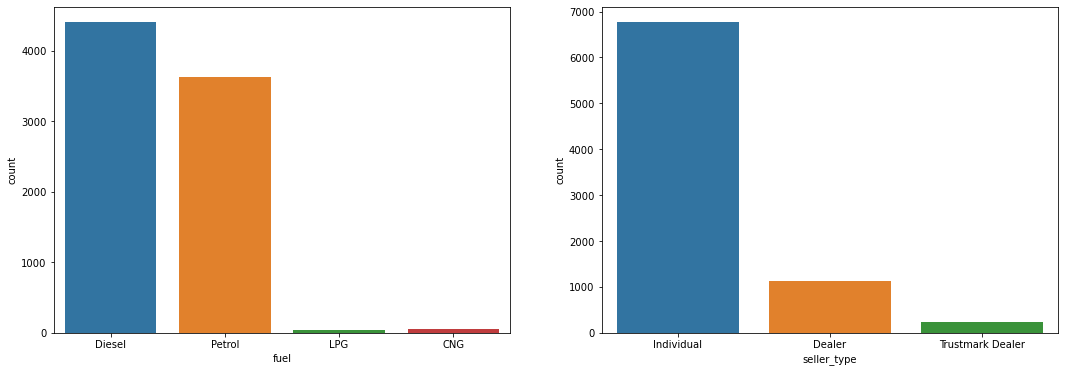

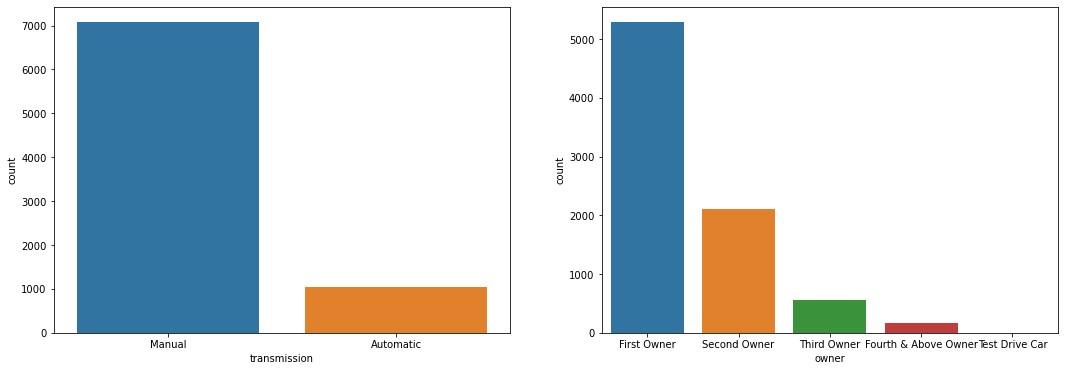

In [18]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[18,6])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

- Diesel and Petrol fuel are the most popluar in the data
- Individual sellers are most popular than other sellers
- Manual Cars are most popular tham automatic cars

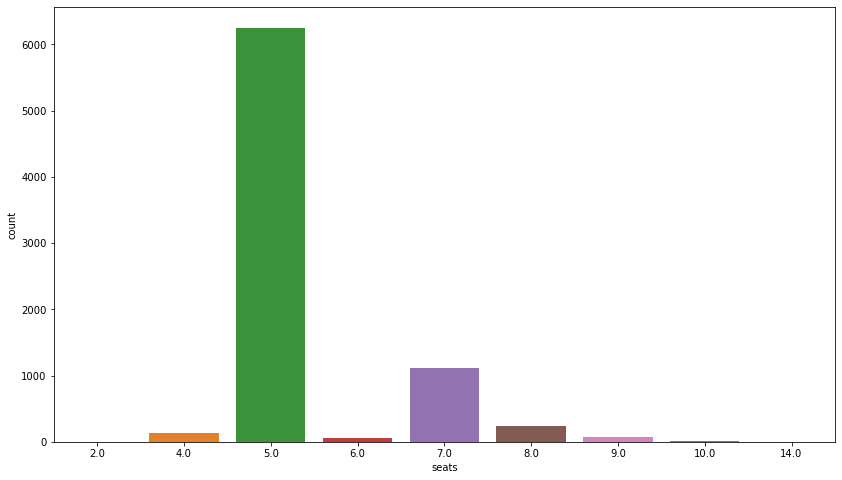

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(x='seats', data=df);

5 seats in the car is most popular

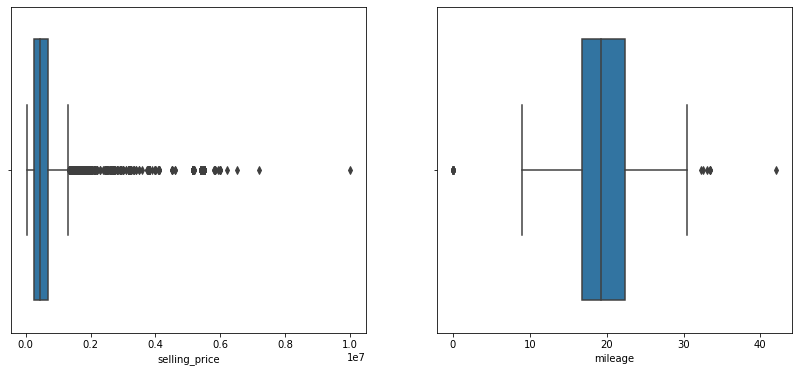

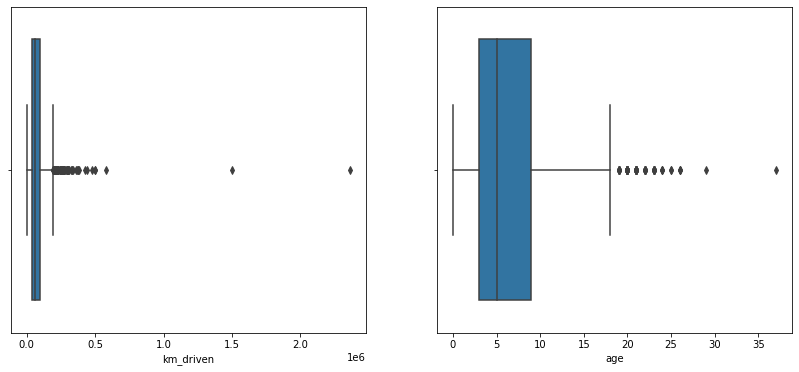

In [20]:
num_cols = ['selling_price','mileage','km_driven','age']
i=0
while i < 4:
    fig = plt.figure(figsize=[14,6])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

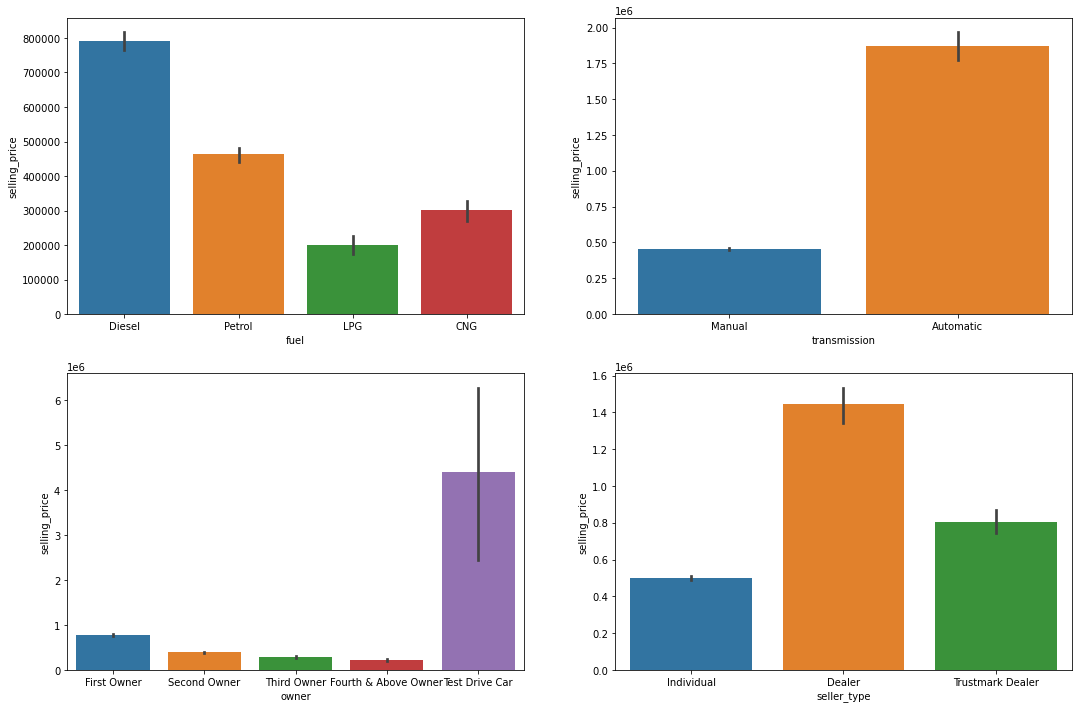

In [21]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.barplot(x='fuel', y='selling_price', data=df);

plt.subplot(2,2,2)
sns.barplot(x='transmission', y='selling_price', data=df)

plt.subplot(2,2,3)
sns.barplot(x='owner', y='selling_price', data=df)

plt.subplot(2,2,4)
sns.barplot(x='seller_type', y='selling_price', data=df)


plt.show()

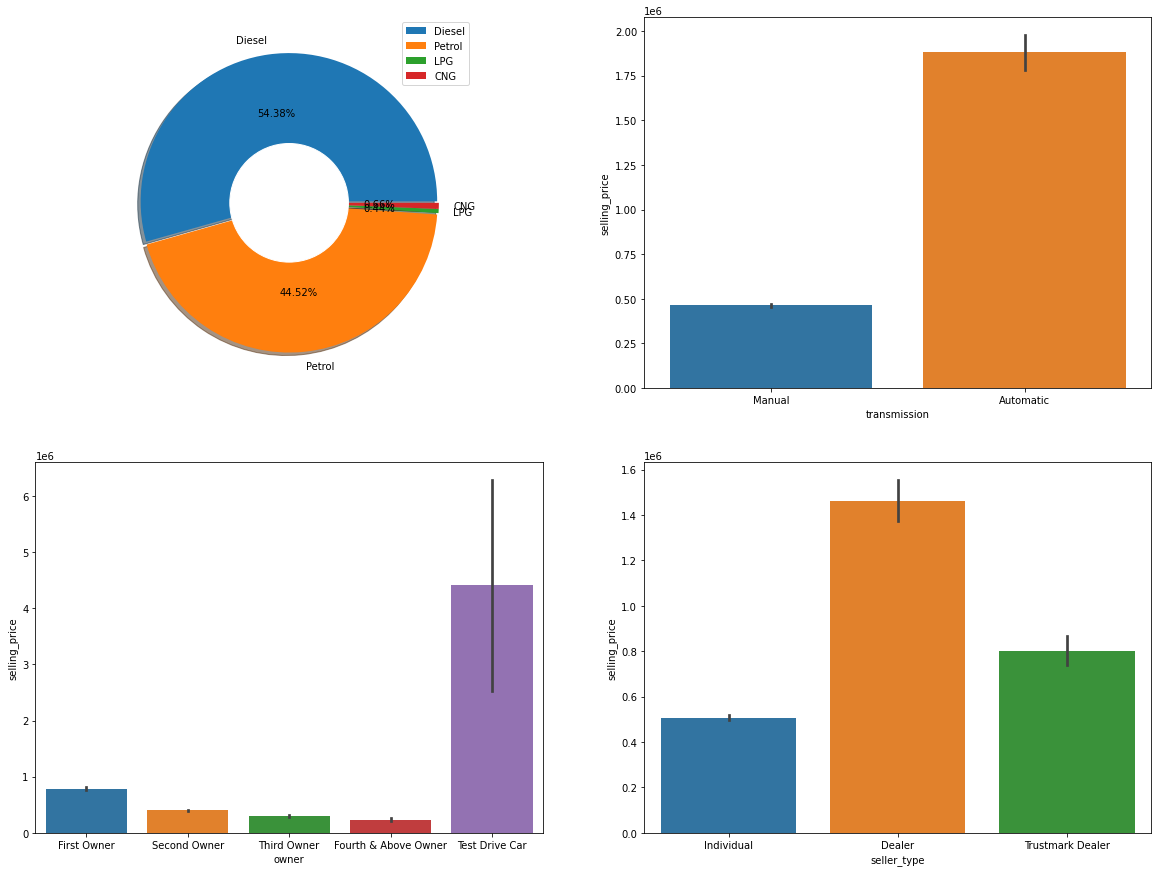

In [103]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
diesel = df.fuel[df['fuel'] == 'Diesel'].count()
petrol = df.fuel[df['fuel'] == 'Petrol'].count()
lpg = df.fuel[df['fuel'] == 'LPG'].count()
cng = df.fuel[df['fuel'] == 'CNG'].count()
plt.pie([diesel, petrol, lpg, cng], labels=['Diesel', 'Petrol', 'LPG', 'CNG'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01,0.01, 0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.subplot(2,2,2)
sns.barplot(x='transmission', y='selling_price', data=df)

plt.subplot(2,2,3)
sns.barplot(x='owner', y='selling_price', data=df)

plt.subplot(2,2,4)
sns.barplot(x='seller_type', y='selling_price', data=df)


plt.show()

- price goes higher with Diesel fuel, automatic transmission, Dealer Seller and test Drive Car

In [22]:
df.engine.value_counts()

1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2835 CC       1
1950 CC       1
1422 CC       1
1339 CC       1
2650 CC       1
Name: engine, Length: 121, dtype: int64

In [23]:
def convert_engine_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the CC
    try:
        return float(x)
    except:
        return None

In [24]:
df.engine = df.engine.apply(convert_engine_to_num)
df.engine.dtypes

dtype('float64')

In [25]:
df[df.selling_price > df.selling_price.quantile(0.99)]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
136,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79 bhp,620Nm@ 1600-2400rpm,5.0,3
139,BMW X4 M Sport X xDrive20d,5800000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1
148,Mercedes-Benz S-Class S 350 CDI,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282 bhp,490Nm@ 1600rpm,5.0,3
170,Volvo XC90 T8 Excellence BSIV,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400 bhp,640Nm@ 1740rpm,4.0,3
384,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,BMW 6 Series GT 630d Luxury Line,5830000,30000,Diesel,Individual,Automatic,First Owner,17.09,2993.0,261.4 bhp,620Nm@ 2000-2500rpm,4.0,2
7713,Mercedes-Benz S-Class S 350 CDI,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79 bhp,620Nm@ 1600-2400rpm,5.0,3
7872,BMW X4 M Sport X xDrive20d,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1
7873,BMW X4 M Sport X xDrive20d,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190 bhp,400Nm@ 1750-2500rpm,5.0,1


In [26]:
df.columns[df.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

<a id='4.1'></a>
***handling null values***

In [27]:
df.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
age                0
dtype: int64

In [28]:
df2 = df.copy()
df2.engine = df2.engine.fillna(0)

In [29]:
df2[df2['engine'] == 0].head(50)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
13,Maruti Swift 1.3 VXi,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,13
31,Fiat Palio 1.2 ELX,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,17
78,Tata Indica DLS,50000,70000,Diesel,Individual,Manual,First Owner,NaN,0.0,NaN,NaN,NaN,17
87,Maruti Swift VDI BSIV W ABS,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,0.0,NaN,NaN,NaN,5
119,Maruti Swift VDI BSIV,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,10
138,BMW X1 sDrive 20D xLine,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,0.0,NaN,NaN,NaN,3
200,Toyota Etios GD,235000,120000,Diesel,Individual,Manual,First Owner,NaN,0.0,NaN,NaN,NaN,8
206,Maruti Omni E 8 Str STD,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,17
228,Maruti Swift 1.3 VXi,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,12
252,Tata Indica DLS,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,0.0,NaN,NaN,NaN,15


- it seems null values are all same rows we can drop them safely

In [30]:
df.shape

(8128, 13)

In [31]:
df.dropna(inplace=True)
df.shape

(7906, 13)

In [32]:
df.head(2)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,6


In [33]:
df.max_power.value_counts()

74 bhp        377
81.80 bhp     220
88.5 bhp      204
67 bhp        165
46.3 bhp      162
             ... 
103.26 bhp      1
197.2 bhp       1
144 bhp         1
201.1 bhp       1
98.82 bhp       1
Name: max_power, Length: 320, dtype: int64

In [34]:
def convert_max_power_to_num(x):
    x = str(x)
    tokens = x.split(' ') # split the values by ' ' putting them into list
    if len(tokens) == 2:
        return float(tokens[0]) # this will return only the first integer number and ignores the bhp
    try:
        return float(x)
    except:
        return None

In [35]:
df.max_power = df.max_power.apply(convert_max_power_to_num)
df.max_power.dtypes

dtype('float64')

In [36]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,13


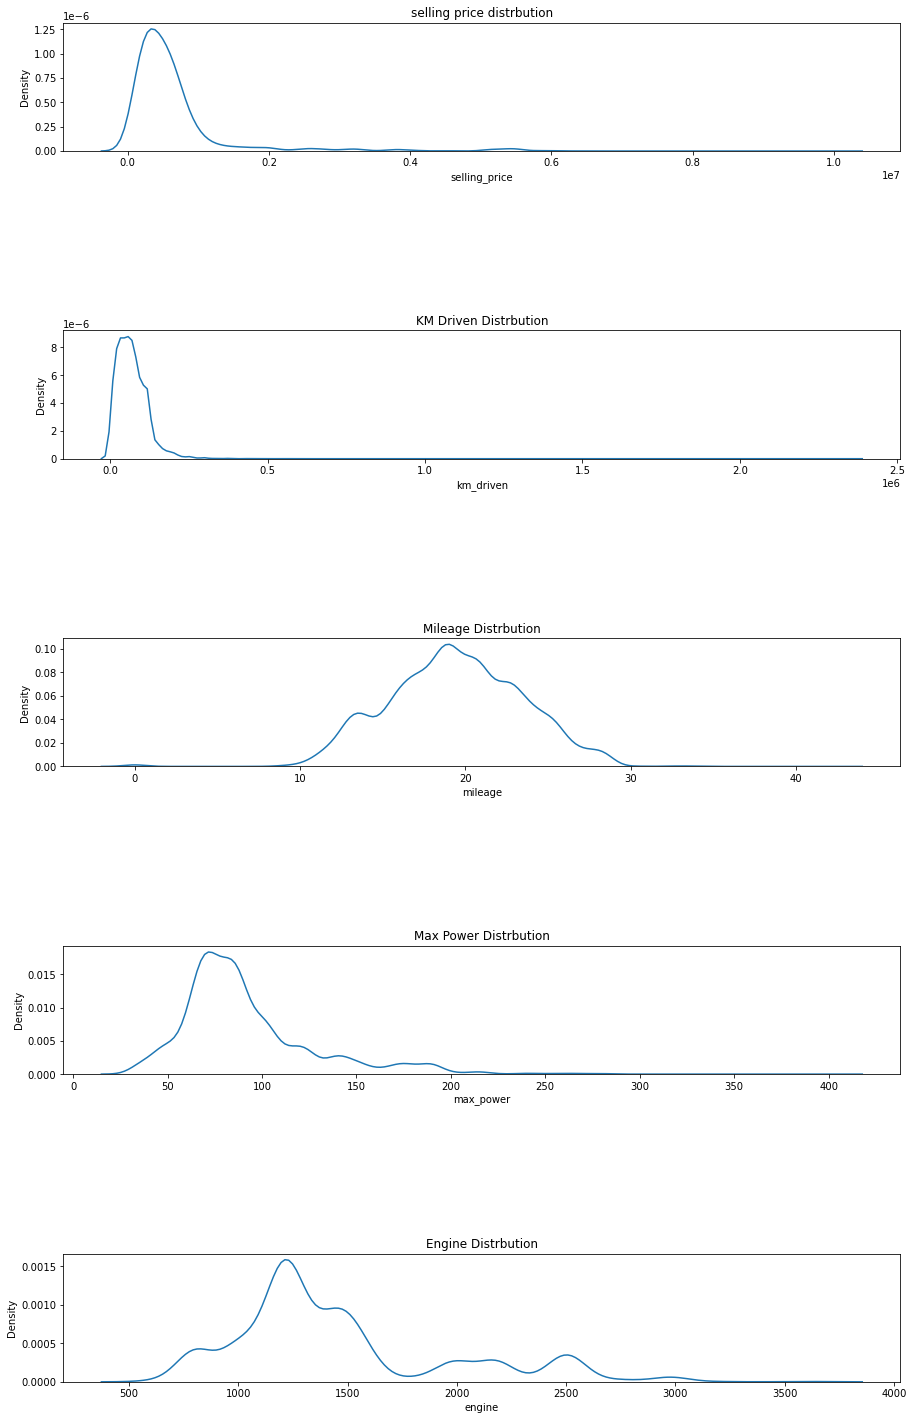

In [37]:
plt.figure(figsize=(15,25))
plt.subplot(9,1,1)
plt.title("selling price distrbution")
sns.kdeplot(x='selling_price', data=df)

plt.subplot(9,1,3)
plt.title("KM Driven Distrbution")
sns.kdeplot(x='km_driven', data=df);

plt.subplot(9,1,5)
plt.title("Mileage Distrbution")
sns.kdeplot(x='mileage', data=df);

plt.subplot(9,1,7)
plt.title("Max Power Distrbution")
sns.kdeplot(x='max_power', data=df);

plt.subplot(9,1,9)
plt.title("Engine Distrbution")
sns.kdeplot(x='engine', data=df);

In [38]:
cont_features = [col for col in list(df.columns) if df[col].nunique() >= 25]
cont_features

['name',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'age']

In [39]:
cont_features.remove('name')

In [40]:
cont_features.remove('torque')
cont_features

['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age']

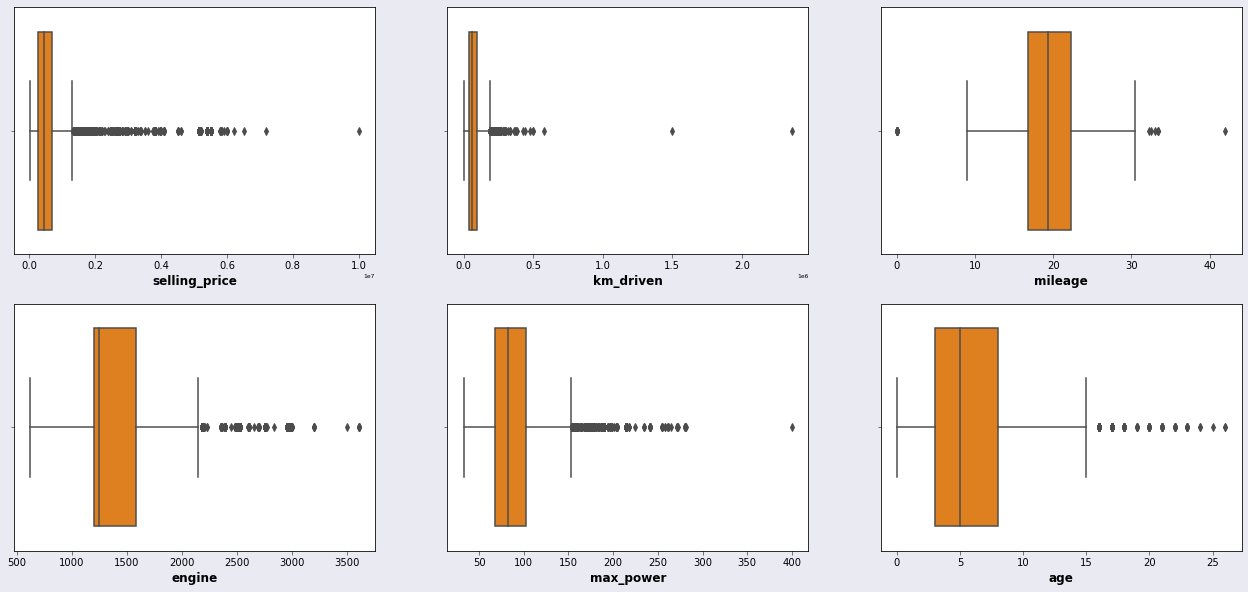

In [41]:
ncols = 3
nrows = int(len(cont_features) / ncols + (len(list(df.columns)) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c], palette='autumn')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

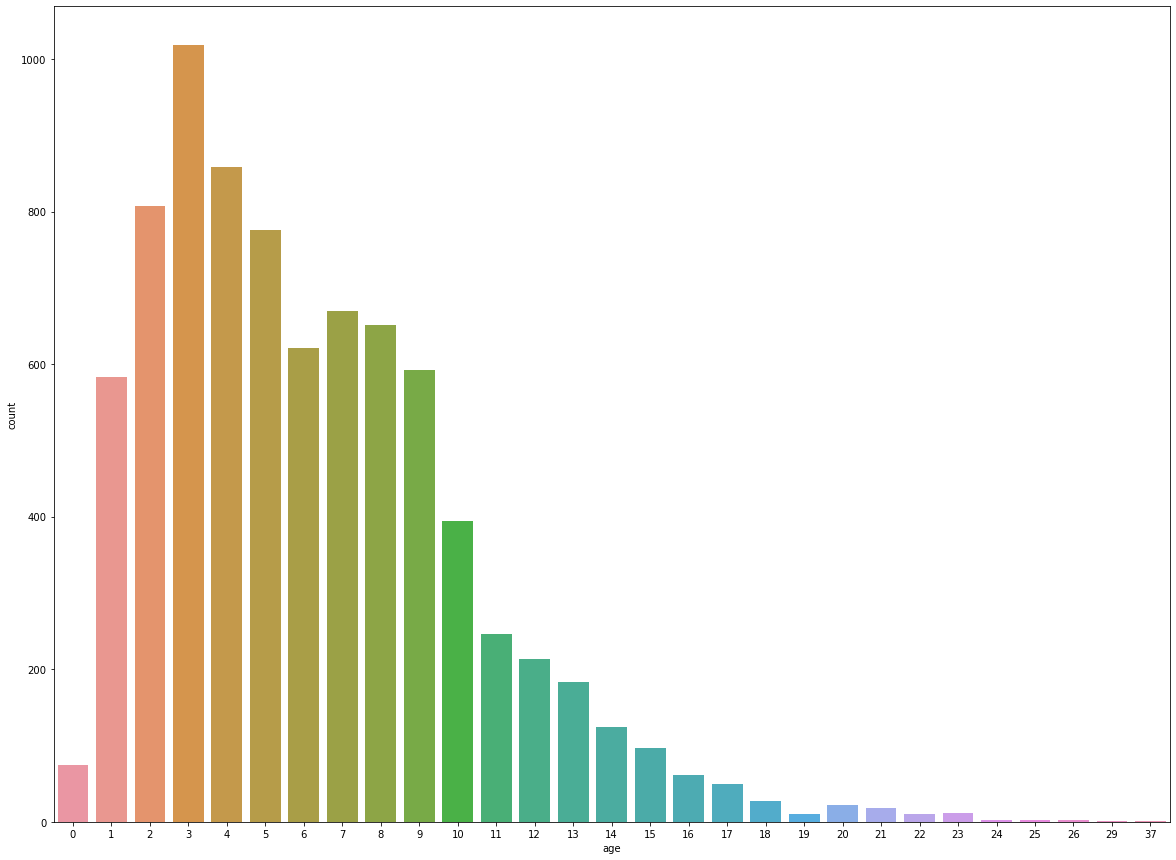

In [46]:
plt.figure(figsize=(20,15))
sns.countplot(x='age', data=df2);

In [47]:
df2 = df.copy()

In [48]:
len(df2.name.unique())

1982

In [49]:
df2.drop('torque', axis=1, inplace=True) # as an ambigous feature
df2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,13


<a id='4.2'></a>
***Label Encoder***

In [50]:
encode = LabelEncoder()
list_transform = ['fuel','seller_type','transmission','owner']

for i in list_transform:
    df2[i] = encode.fit_transform(df2[i])

In [51]:
df2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,6
2,Honda City 2017-2020 EXi,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,14
3,Hyundai i20 Sportz Diesel,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,10
4,Maruti Swift VXI BSIII,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,13


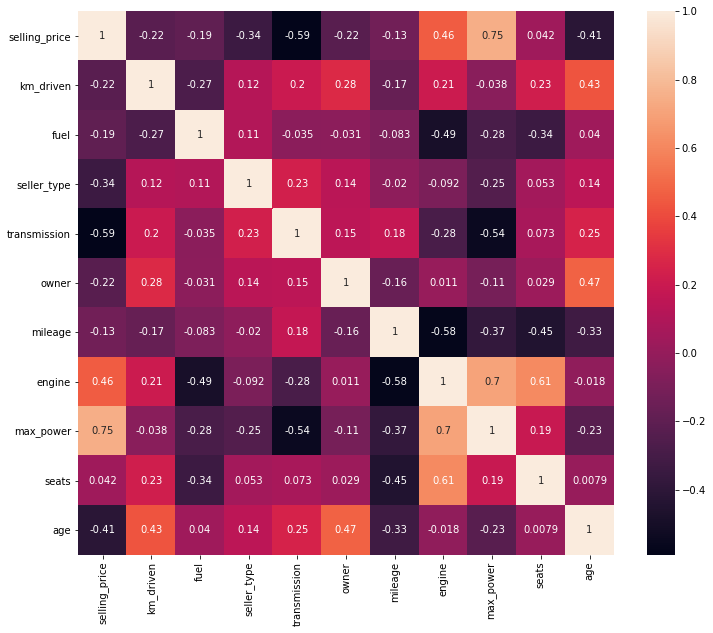

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot=True);

- max power is highly Postivily correlated with price (75%)
- transmission is Postivily correlated with price (60%)
- car price is also depends on the car brand (name) because each car has it's own features

In [53]:
df2.name = df2.name.apply(lambda x: x.strip())
name_stats = df2['name'].value_counts(ascending=False)
name_stats

Maruti Swift Dzire VDI                    129
Maruti Alto 800 LXI                        82
Maruti Alto LXi                            71
BMW X4 M Sport X xDrive20d                 62
Maruti Swift VDI                           61
                                         ... 
Renault Duster 85PS Diesel RxL Explore      1
Hyundai Xcent 1.2 Kappa SX                  1
Tata Manza Aura (ABS) Safire BS IV          1
Tata Aria Prestige 4x2                      1
Ford Fiesta 1.4 Duratorq EXI                1
Name: name, Length: 1982, dtype: int64

Any name having less than 5 data points should be tagged as "other" name. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns 

In [54]:
name_stats_less_than_5 = name_stats[name_stats<=5]

In [55]:
df2.name = df2.name.apply(lambda x: 'other' if x in name_stats_less_than_5 else x)
len(df2.name.unique())

317

<a id='4.3'></a>
***apply one hot encoder***

In [56]:
df3 = df2.copy()

In [57]:
dummies = pd.get_dummies(df3.name)
dummies.head()

,Audi Q5 35TDI Premium Plus,BMW 5 Series 520d Sport Line,BMW 6 Series GT 630d Luxury Line,BMW X1 sDrive20d M Sport,BMW X4 M Sport X xDrive20d,Chevrolet Beat Diesel,Chevrolet Beat Diesel LS,Chevrolet Beat Diesel LT,Chevrolet Beat LS,Chevrolet Beat LT,...,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
dummies.drop('other', axis=1,inplace=True)
dummies.shape

(7906, 316)

In [59]:
df3 = pd.concat([df3 , dummies], axis=1)
df3.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,Maruti Swift Dzire VDI,450000,145500,1,1,1,0,23.40,1248.0,74.00,...,0,0,0,0,0,0,0,0,0,0
1,other,370000,120000,1,1,1,2,21.14,1498.0,103.52,...,0,0,0,0,0,0,0,0,0,0
2,Honda City 2017-2020 EXi,158000,140000,3,1,1,4,17.70,1497.0,78.00,...,0,0,0,0,0,0,0,0,0,0
3,other,225000,127000,1,1,1,0,23.00,1396.0,90.00,...,0,0,0,0,0,0,0,0,0,0
4,other,130000,120000,3,1,1,0,16.10,1298.0,88.20,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df3.drop('name', axis=1, inplace=True)
df3.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,Toyota Innova Crysta 2.8 ZX AT BSIV,Volkswagen Ameo 1.5 TDI Comfortline,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,...,0,0,0,0,0,0,0,0,0,0
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,...,0,0,0,0,0,0,0,0,0,0


<a id='5'></a>
# Assign feature and target variables

In [61]:
X = df3.drop("selling_price", axis=1)
y = df3.selling_price

# Spliting the data into Training and Testing data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=40)

In [63]:
len(X_train)

5929

In [64]:
len(X_test)

1977

<a id='7'></a>
# Modeling

In [65]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

<a id='7.1'></a>
## Linear Regression Model

In [67]:
lr = LinearRegression()
kfolds(lr, "Linear Regression")
train(lr, "Linear Regression")
r2(lr, "Linear Regression")

Linear Regression score on cross validation: 88.47977006359994%
Linear Regression model score on Training data: 87.8659977704305%
Linear Regression model score on Testing data: 92.9492253477467%
R2 Score for Linear Regression is 92.9492253477467%


<a id='7.2'></a>
## Random Forest Model

In [68]:
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest score on cross validation: 96.59539172361387%
Random Forest model score on Training data: 99.57331359600715%
Random Forest model score on Testing data: 97.34976314961642%
R2 Score for Random Forest is 97.34976314961642%


<a id='7.3'></a>
## Bagging Model

In [74]:
br = BaggingRegressor(n_estimators=200, random_state=0)
kfolds(br, "Bagging")
train(br, "Bagging")
r2(br, "Bagging")

Bagging score on cross validation: 96.73599043722565%
Bagging model score on Training data: 99.52428976815375%
Bagging model score on Testing data: 97.3377121170965%
R2 Score for Bagging is 97.3377121170965%


<a id='7.4'></a>
## Gradient Boosting Model

In [75]:
gbr = GradientBoostingRegressor()
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")
r2(gbr, "Gradient Boosting")

Gradient Boosting score on cross validation: 94.8136701219393%
Gradient Boosting model score on Training data: 96.76869608384479%
Gradient Boosting model score on Testing data: 95.84672541673905%
R2 Score for Gradient Boosting is 95.84672541673905%


<a id='7.5'></a>
## KNN

In [76]:
knn = KNeighborsRegressor()
kfolds(knn, "KNN")
train(knn, "KNN")
r2(knn, "KNN")

KNN score on cross validation: 79.97294651355898%
KNN model score on Training data: 86.39776600436906%
KNN model score on Testing data: 85.69396626625979%
R2 Score for KNN is 85.69396626625979%


<a id='7.6'></a>
## Decision Tree Regressor

In [77]:
dtr = DecisionTreeRegressor()
kfolds(dtr, "Decision Tree")
train(dtr, "Decision Tree")
r2(dtr, "Decision Tree")

Decision Tree score on cross validation: 94.59512535388535%
Decision Tree model score on Training data: 99.98825513474671%
Decision Tree model score on Testing data: 95.56466310421735%
R2 Score for Decision Tree is 95.56466310421735%


<a id='7.7'></a>
## XGBoost

In [78]:
xgboost = XGBRegressor()
kfolds(xgboost, "XGBoost")
train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost score on cross validation: 96.45666386827081%
XGBoost model score on Training data: 99.17638594110902%
XGBoost model score on Testing data: 97.44644339281143%
R2 Score for XGBoost is 97.44644339281143%
